Import required libraries

In [3]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Connect to SQL

In [4]:
conn = pyodbc.connect('Driver={SQL Server};' 
                      'Server=-----------------;' 
                      'Database=AdventureWorks2019;' 
                      'Trusted_Connection=yes;')

Create cursor

In [5]:
cursor = conn.cursor()

Create a query and assign to a variable

In [6]:
query1 = 'Select COUNT(s.Name) AS NumberofStores, AVG(s.AnnualRevenue) AS AverageRevenue , s.YearOpened From Sales.vStoreWithDemographics AS s GROUP BY s.YearOpened ORDER BY s.YearOpened'

import table from query and assign to a variable

In [7]:
tradingduration = pd.read_sql(query1, conn)

C:\Users\Bradley\AppData\Local\Temp\ipykernel_3352\101726776.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tradingduration = pd.read_sql(query1, conn)


create visual of data

Text(0, 0.5, 'Average Store Revenue')

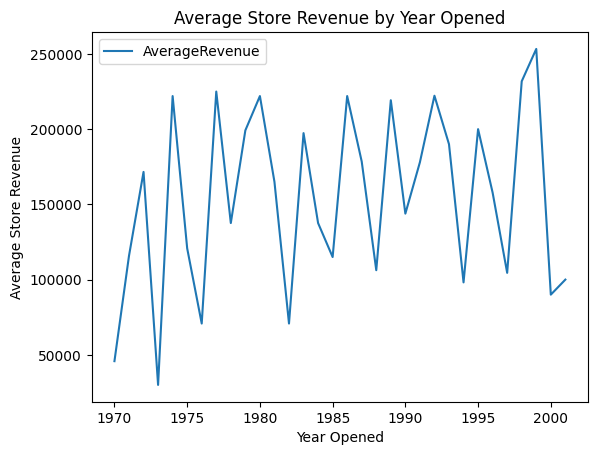

In [8]:
tradingduration.plot(x='YearOpened', y='AverageRevenue')
plt.title('Average Store Revenue by Year Opened')
plt.xlabel('Year Opened')
plt.ylabel('Average Store Revenue')

Initially plotted the data as a line however I decided this was ugly and not intuative or easy to read so I opted for a scatter plot instead

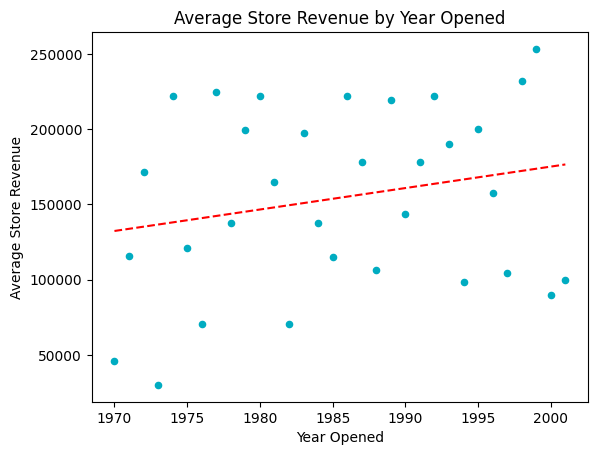

In [9]:
tradingduration.plot.scatter(x='YearOpened', y='AverageRevenue',color='#00ACC1')
plt.title('Average Store Revenue by Year Opened')
plt.xlabel('Year Opened')
plt.ylabel('Average Store Revenue')

# add a trendline
z = np.polyfit(tradingduration['YearOpened'], tradingduration['AverageRevenue'], 1)
p = np.poly1d(z)
plt.plot(tradingduration['YearOpened'], p(tradingduration['YearOpened']),'r--')
plt.show()

repeat and change year openned to trading duration (current year - year opened)

In [10]:
query2 = 'Select COUNT(s.Name) AS NumberofStores, AVG(s.AnnualRevenue) AS AverageRevenue, 2014 - s.YearOpened AS YearsTrading, s.Specialty From Sales.vStoreWithDemographics AS s GROUP BY s.Specialty, s.YearOpened ORDER BY s.YearOpened'
tradingdurationall = pd.read_sql(query2, conn)

C:\Users\Bradley\AppData\Local\Temp\ipykernel_3352\1193521352.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tradingdurationall = pd.read_sql(query2, conn)


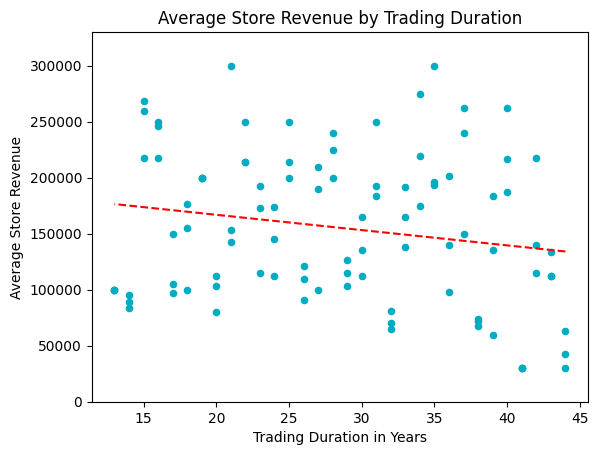

In [11]:

tradingdurationall.plot.scatter(x='YearsTrading', y='AverageRevenue',color='#00ACC1')
plt.title('Average Store Revenue by Trading Duration')
plt.xlabel('Trading Duration in Years')
plt.ylabel('Average Store Revenue')
plt.ylim(0,330000)

z = np.polyfit(tradingdurationall['YearsTrading'], tradingdurationall['AverageRevenue'], 1)
p = np.poly1d(z)
plt.plot(tradingdurationall['YearsTrading'], p(tradingdurationall['YearsTrading']),'r--')
plt.show()

Filter by specialty to see if different specialties have different results

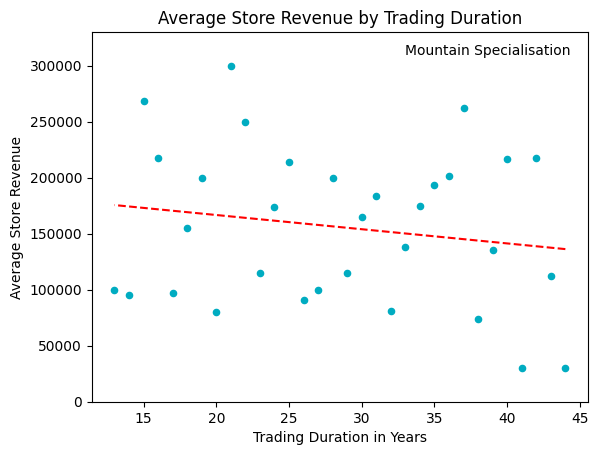

In [12]:
tradingdurationmtn = tradingdurationall[tradingdurationall['Specialty'] == 'Mountain']

tradingdurationmtn.plot.scatter(x='YearsTrading', y='AverageRevenue',color='#00ACC1')
plt.title('Average Store Revenue by Trading Duration')
plt.xlabel('Trading Duration in Years')
plt.ylabel('Average Store Revenue')
plt.ylim(0,330000)
plt.text(33, 310000,'Mountain Specialisation')

z = np.polyfit(tradingdurationmtn['YearsTrading'], tradingdurationmtn['AverageRevenue'], 1)
p = np.poly1d(z)
plt.plot(tradingdurationmtn['YearsTrading'], p(tradingdurationmtn['YearsTrading']),'r--')
plt.show()

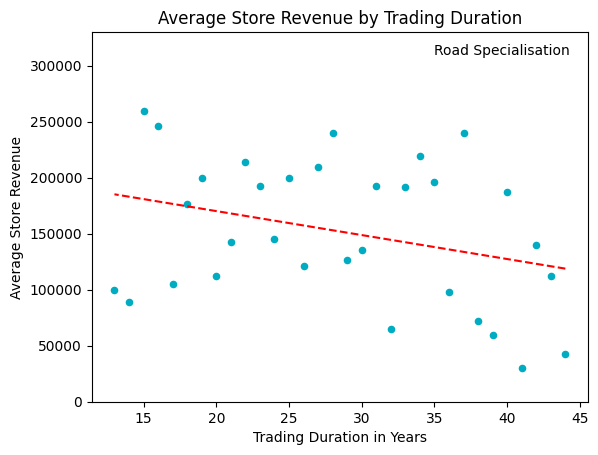

In [13]:
tradingdurationrd = tradingdurationall[tradingdurationall['Specialty'] == 'Road']

tradingdurationrd.plot.scatter(x='YearsTrading', y='AverageRevenue',color='#00ACC1')
plt.title('Average Store Revenue by Trading Duration')
plt.xlabel('Trading Duration in Years')
plt.ylabel('Average Store Revenue')
plt.ylim(0,330000)
plt.text(35, 310000,'Road Specialisation')

z = np.polyfit(tradingdurationrd['YearsTrading'], tradingdurationrd['AverageRevenue'], 1)
p = np.poly1d(z)
plt.plot(tradingdurationrd['YearsTrading'], p(tradingdurationrd['YearsTrading']),'r--')
plt.show()

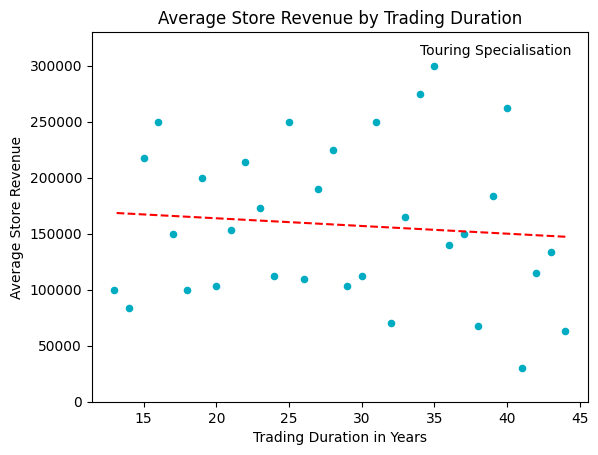

In [14]:
tradingdurationtrg = tradingdurationall[tradingdurationall['Specialty'] == 'Touring']

tradingdurationtrg.plot.scatter(x='YearsTrading', y='AverageRevenue',color='#00ACC1')
plt.title('Average Store Revenue by Trading Duration')
plt.xlabel('Trading Duration in Years')
plt.ylabel('Average Store Revenue')
plt.ylim(0,330000)
plt.text(34, 310000,'Touring Specialisation')

z = np.polyfit(tradingdurationtrg['YearsTrading'], tradingdurationtrg['AverageRevenue'], 1)
p = np.poly1d(z)
plt.plot(tradingdurationtrg['YearsTrading'], p(tradingdurationtrg['YearsTrading']),'r--')
plt.show()

Move all data to 1 visual


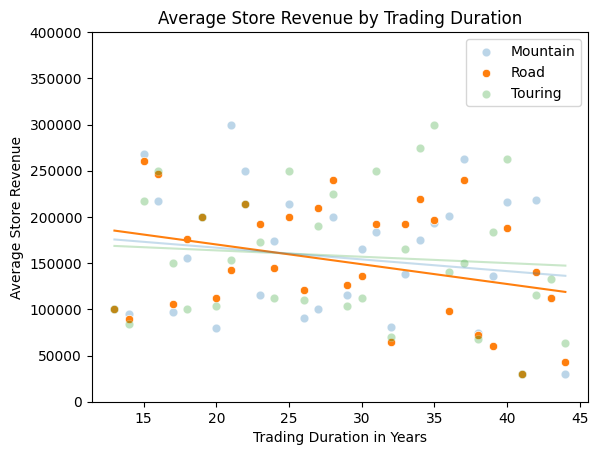

In [15]:

highlight_category = 'Road'
categories = tradingdurationall['Specialty'].unique()

#assign different colors to different categories and highlight roads category
for category in categories:
    subset = tradingdurationall[tradingdurationall['Specialty'] == category]
    if category == highlight_category:
        alpha = 1.0
    else :
        alpha = 0.3
    sns.scatterplot(data=subset, x='YearsTrading', y='AverageRevenue', 
                    label=category, alpha=alpha)

plt.title('Average Store Revenue by Trading Duration')
plt.xlabel('Trading Duration in Years')
plt.ylabel('Average Store Revenue')
plt.ylim(0,400000)


#adding 3 seperate trendlines
zt = np.polyfit(tradingdurationtrg['YearsTrading'], tradingdurationtrg['AverageRevenue'], 1)
pt = np.poly1d(zt)
plt.plot(tradingdurationtrg['YearsTrading'], pt(tradingdurationtrg['YearsTrading']),color = 'tab:green', alpha = 0.25)

zr = np.polyfit(tradingdurationrd['YearsTrading'], tradingdurationrd['AverageRevenue'], 1)
pr = np.poly1d(zr)
plt.plot(tradingdurationrd['YearsTrading'], pr(tradingdurationrd['YearsTrading']), color = 'tab:orange')

zm = np.polyfit(tradingdurationmtn['YearsTrading'], tradingdurationmtn['AverageRevenue'], 1)
pm = np.poly1d(zm)
plt.plot(tradingdurationmtn['YearsTrading'], pm(tradingdurationmtn['YearsTrading']), color = 'tab:blue', alpha = 0.25)

plt.show()

trying a few other visuals to see if I can find any more insights

Text(0, 0.5, 'Average Store Revenue')

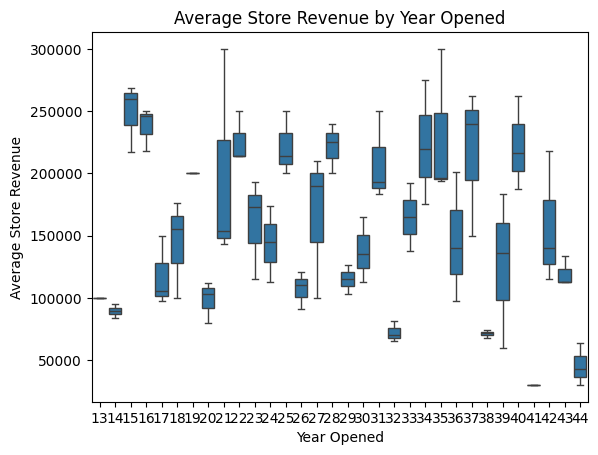

In [16]:
sns.boxplot(x=tradingdurationall['YearsTrading'], y=tradingdurationall['AverageRevenue'])
plt.title('Average Store Revenue by Year Opened')
plt.xlabel('Year Opened')
plt.ylabel('Average Store Revenue')

Explore potential differences with store size goups

In [17]:
query3 = "SELECT COUNT(s.Name) AS NumberofStores, AVG(s.AnnualRevenue) AS AverageRevenue, 2014 - s.YearOpened AS YearsTrading, CASE WHEN s.SquareFeet >= 90000 THEN '90000+' ELSE CONCAT(FLOOR(s.SquareFeet / 10000) * 10000, ' - ', FLOOR(s.SquareFeet / 10000) * 10000 + 9999) END AS SquareFeetRange FROM Sales.vStoreWithDemographics AS s GROUP BY CASE WHEN s.SquareFeet >= 90000 THEN '90000+' ELSE CONCAT(FLOOR(s.SquareFeet / 10000) * 10000, ' - ', FLOOR(s.SquareFeet / 10000) * 10000 + 9999) END, s.YearOpened ORDER BY SquareFeetRange;"
tradingdurationsize = pd.read_sql(query3, conn)

C:\Users\Bradley\AppData\Local\Temp\ipykernel_3352\3442605997.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tradingdurationsize = pd.read_sql(query3, conn)


<function matplotlib.pyplot.show(close=None, block=None)>

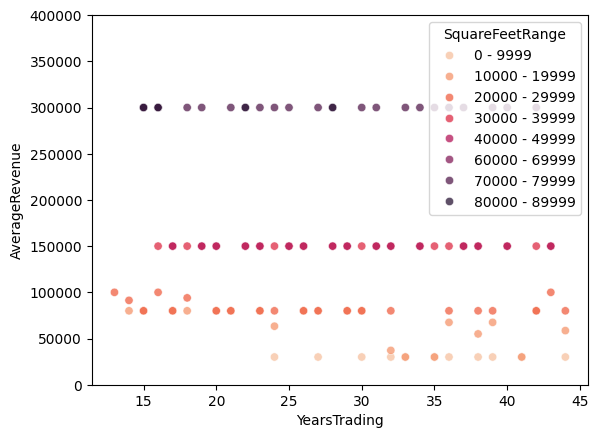

In [ ]:

sns.scatterplot(
    data=tradingdurationsize,
    hue="SquareFeetRange",
    y="AverageRevenue",
    x="YearsTrading", 
    palette="rocket_r",  
    alpha=0.75
)
plt.ylim(0,400000)
plt.show